In [34]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import string
import seaborn as sns
import datetime as dt

%matplotlib inline

In [35]:
ee_results = pd.read_csv('../../Analyses/Expert-elicitation/Outputs/results_January_2020_cm.csv')
ee_results['date'] = pd.to_datetime(ee_results['date'], dayfirst=True)
ee_results_2 = ee_results[ee_results.p_cm == ">=2"]
ee_results_6 = ee_results[ee_results.p_cm == ">=6"]
ee_results_10 = ee_results[ee_results.p_cm == ">=10"]
ee_results_20 = ee_results[ee_results.p_cm == ">=20"]

In [43]:
ee_results_2

,Unnamed: 0,HZ,date,expert,expert.date,p_cm_val,p_cm
0,1,BENI,2019-12-23,9,expert 9 23-12-2019,0.90,>=2
1,2,BENI,2019-12-17,10,expert 10 17-12-2019,0.70,>=2
2,3,BENI,2019-12-17,1,expert 1 17-12-2019,1.00,>=2
3,4,BENI,2019-12-23,11,expert 11 23-12-2019,0.95,>=2
4,5,BENI,2019-12-18,4,expert 4 18-12-2019,0.75,>=2
5,6,BENI,2019-12-19,5,expert 5 19-12-2019,1.00,>=2
6,7,BENI,2019-12-19,2,expert 2 19-12-2019,1.00,>=2
7,8,BENI,2019-12-23,8,expert 8 23-12-2019,0.60,>=2
8,9,BIENA,2019-12-18,4,expert 4 18-12-2019,0.70,>=2
9,10,BIENA,2019-12-23,9,expert 9 23-12-2019,0.80,>=2


In [36]:
expert_dates = dict([list(np.array(ee_results[['expert', 'date']][ee_results.expert == e])[1]) for e in np.sort(ee_results.expert.unique())],
            columns=['expert', 'date'])

In [37]:
import colorsys
N = 10
HSV_tuples = [(x*1.0/N, 0.5, 0.5) for x in range(N)]
RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)

In [38]:
forecast_frame_list = [pd.read_csv("forecasts/ebola_risks_January_2020_" + dt.datetime.strftime(expert_dates[e], "%Y-%m-%d") + ".csv") for e in np.sort(ee_results.expert.unique())]

In [44]:
forecast_frame_list[1]

,Unnamed: 0,PROVINCE,ADM2_NAME,casestodate,risk_TH_2,risk_TH_6,risk_TH_10,risk_TH_20
0,1,Haut-Uele,Aba,0,0.001,0.000,0.000,0.000
1,2,Ituri,Adi,0,0.003,0.001,0.000,0.000
2,3,Ituri,Adja,0,0.004,0.001,0.001,0.000
3,4,Bas-Uele,Aketi,0,0.002,0.001,0.000,0.000
4,5,Nord-Kivu,Alimbongo,5,0.196,0.054,0.020,0.004
...,...,...,...,...,...,...,...,...
164,165,Tshopo,Yahisuli,0,0.001,0.000,0.000,0.000
165,166,Tshopo,Yahuma,0,0.000,0.000,0.000,0.000
166,167,Tshopo,Yakusu,0,0.002,0.000,0.000,0.000
167,168,Tshopo,Yaleko,0,0.001,0.000,0.000,0.000


In [39]:
capitalize = lambda a : a.upper()

In [45]:
HZs = forecast_frame_list[0].ADM2_NAME.apply(capitalize)

In [47]:
forecast_frame_list_trunc = [f[[hz in ee_results.HZ.unique() for hz in HZs]] for f in forecast_frame_list]


In [87]:
expert_date_frame = pd.DataFrame.from_dict(expert_dates, orient='index').reset_index()

expert_date_frame.columns = ['expert', 'date']

experts = expert_date_frame[:-1].sort_values('date').expert

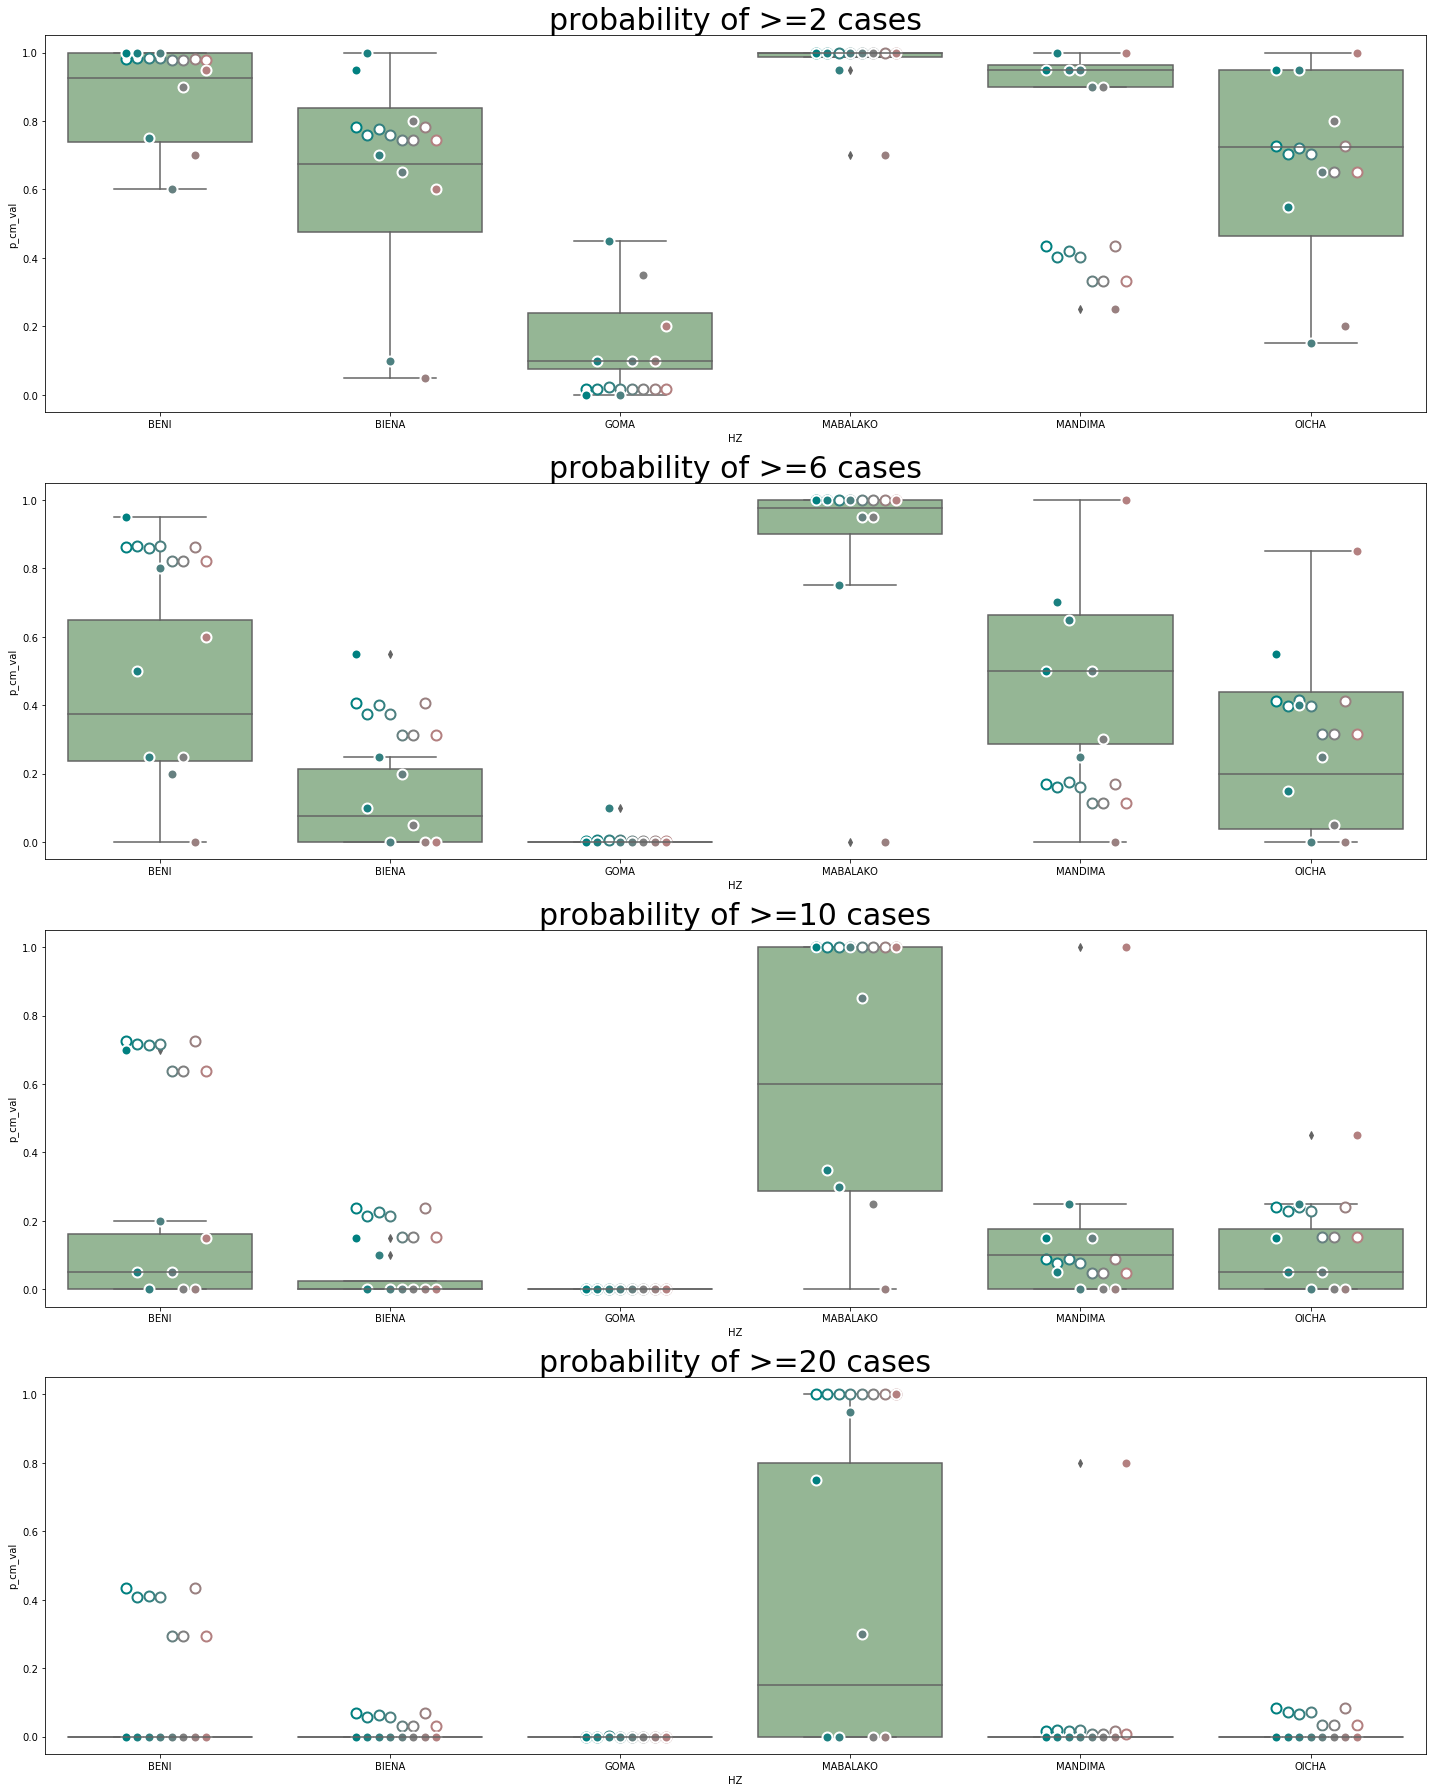

In [88]:


fig = plt.figure(figsize=[20,25])
ax = fig.add_subplot(411)
sns.boxplot(data = ee_results_2, x="HZ", y="p_cm_val", ax=ax, color="DarkSeaGreen")
for i, f in enumerate(forecast_frame_list_trunc):
    plt.plot(np.arange(0,6)-0.15+i/20, f.risk_TH_2, 'o', ms=10, mfc="White", mew=2, color=HSV_tuples[i])
    plt.plot(np.arange(0,6)-0.15+i/20, ee_results_2.sort_values(by='HZ').p_cm_val[ee_results_2.expert == experts[i]], 'o', ms=10, mec="white", mew=2, color=HSV_tuples[i])
ax.set_title("probability of >=2 cases", fontsize=30)
    
ax = fig.add_subplot(412)
sns.boxplot(data = ee_results_6, x="HZ", y="p_cm_val", ax=ax, color="DarkSeaGreen")
for i, f in enumerate(forecast_frame_list_trunc):
    plt.plot(np.arange(0,6)-0.15+i/20, f.risk_TH_6, 'o', ms=10, mfc="White", mew=2, color=HSV_tuples[i])
    plt.plot(np.arange(0,6)-0.15+i/20, ee_results_6.sort_values(by='HZ').p_cm_val[ee_results_6.expert == experts[i]], 'o', ms=10, mec="white", mew=2, color=HSV_tuples[i])
ax.set_title("probability of >=6 cases", fontsize=30)    

ax = fig.add_subplot(413)
sns.boxplot(data = ee_results_10, x="HZ", y="p_cm_val", ax=ax, color="DarkSeaGreen")
for i, f in enumerate(forecast_frame_list_trunc):
    plt.plot(np.arange(0,6)-0.15+i/20, f.risk_TH_10, 'o', ms=10, mfc="White", mew=2, color=HSV_tuples[i])
    plt.plot(np.arange(0,6)-0.15+i/20, ee_results_10.sort_values(by='HZ').p_cm_val[ee_results_10.expert == experts[i]], 'o', ms=10, mec="white", mew=2, color=HSV_tuples[i])
ax.set_title("probability of >=10 cases", fontsize=30)    
    
    
    
ax = fig.add_subplot(414)
sns.boxplot(data = ee_results_20, x="HZ", y="p_cm_val", ax=ax, color="DarkSeaGreen",  labels=None)
for i, f in enumerate(forecast_frame_list_trunc):
    plt.plot(np.arange(0,6)-0.15+i/20, f.risk_TH_20, 'o', ms=10, mfc="White", mew=2, color=HSV_tuples[i])
    plt.plot(np.arange(0,6)-0.15+i/20, ee_results_20.sort_values(by='HZ').p_cm_val[ee_results_20.expert == experts[i]], 'o', ms=10, mec="white", mew=2, color=HSV_tuples[i])
ax.set_title("probability of >=20 cases", fontsize=30)    

fig.patch.set_facecolor('white')    
    
fig.tight_layout()
